In [116]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns


# Using Pandas, I will now import my dataset into a dataframe using a CSV reader.   

df = pd.read_csv(r"C:\Users\mubarik\insurance.csv")

# I will now use the Label Encoding tool to assign numerical values to catagorical data.   

#sex
LE = LabelEncoder()
df.sex = LE.fit_transform(df.sex)

# smoker
df.smoker = LE.fit_transform(df.smoker)

# region
df_region = pd.get_dummies(df.region)

df = pd.concat([df,df_region],axis=1)
df = df.drop(['region'],axis=1)

#features variables - this will be our input data which we will use for making predictions. 
x_data = df.drop(['charges'], axis = 1)


#target variable - we want to predict house prices. 
y_data = df['charges']


from sklearn.model_selection import train_test_split

# Below I will use the train_test_split function from scikit-learn to divide 
# the features data (x_data) and target data (y_data) even further into train 
# and test.

x_train, x_test, y_train, y_test = train_test_split(
x_data, y_data, test_size = 0.3, shuffle = False)



# Below I have trained the linear regression model using the
# training data (x_train and y_train).

linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train, y_train)

# We will now use our trained model to make predictions
# for our target variable using the testing data (x_test). 
# This will give us a good depiction of the accuracy of 
# our results. 

y_pred = linear_regression_model.predict(x_test)



import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))



Mean absolute error = 4441.98
Mean squared error = 42058974.17
Median absolute error = 2495.62
Explain variance score = 0.72
R2 score = 0.72


In [117]:
df.corr()['charges']

age          0.299008
sex          0.057292
bmi          0.198341
children     0.067998
smoker       0.787251
charges      1.000000
northeast    0.006349
northwest   -0.039905
southeast    0.073982
southwest   -0.043210
Name: charges, dtype: float64

(10.0, 0.0)

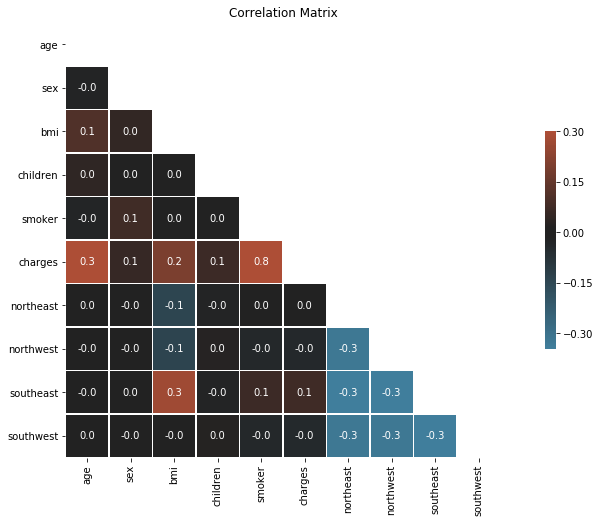

In [120]:
%matplotlib inline

mask = np.triu(np.ones_like(df.corr()))

f,ax = plt.subplots(figsize=(16,8))
               
corr=df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True, center = 'dark')               

sns.heatmap(df.corr(), annot=True, fmt ='.1f',mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlation Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)